In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency

In [83]:
species_info = pd.read_csv('E:\\Semo4ka\\Python\\CodeCademy\\Biodiversity\\species_info.csv')
observations = pd.read_csv('E:\\Semo4ka\\Python\\CodeCademy\\Biodiversity\\observations.csv')

print(species_info.head())
print(observations.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               

In [84]:
data_full = pd.merge(species_info, observations)


In [85]:
data_full.fillna('No Intervention', inplace=True)
data_full['is_protected']=(data_full['conservation_status']!='No Intervention')
print(data_full.head())

  category                scientific_name              common_names  \
0   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
1   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
2   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
3   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
4   Mammal                      Bos bison     American Bison, Bison   

  conservation_status                            park_name  observations  \
0     No Intervention                  Bryce National Park           130   
1     No Intervention            Yellowstone National Park           270   
2     No Intervention  Great Smoky Mountains National Park            98   
3     No Intervention               Yosemite National Park           117   
4     No Intervention               Yosemite National Park           128   

   is_protected  
0         False  
1         False  
2         False  
3         False  
4         False  


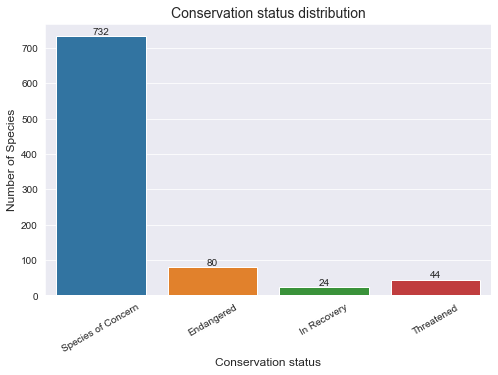

<Figure size 432x288 with 0 Axes>

In [89]:
#What is the distribution of conservation_status for animals?
in_danger = data_full[data_full.conservation_status != 'No Intervention'].reset_index()
sns.set_style('darkgrid')
fig = plt.figure(figsize = (8, 5))
ax = sns.countplot(x = in_danger.conservation_status)
plt.xticks(rotation = 30)
plt.title('Conservation status distribution', fontsize = 14)
plt.ylabel('Number of Species', fontsize = 12)
plt.xlabel('Conservation status', fontsize = 12)
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

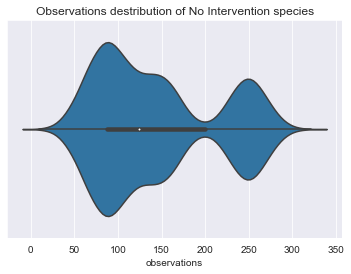

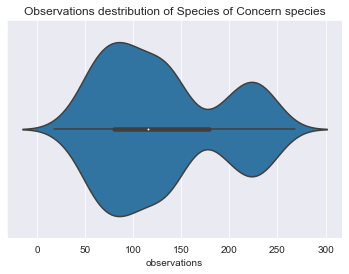

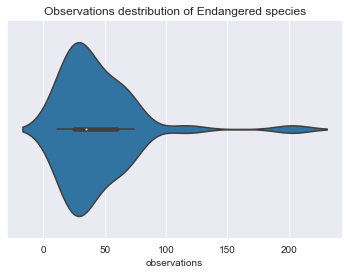

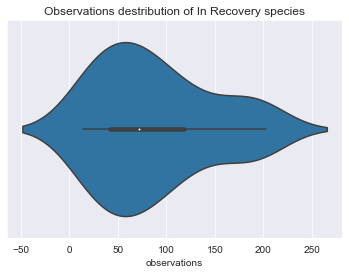

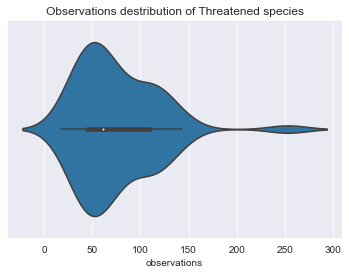

In [90]:
#Observation destribution of species by conservation status

def violinpolt(data, status):
    ax = sns.violinplot(x = data.observations[data_full.conservation_status == status])
    plt.title('Observations destribution of {} species'.format(status))    
    plt.show()

for status in data_full.conservation_status.unique():
    violinpolt(data_full, status)

C:\Users\Owner\AppData\Local\Temp/ipykernel_7984/3438677965.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([0, 5, 10, 15, 20])


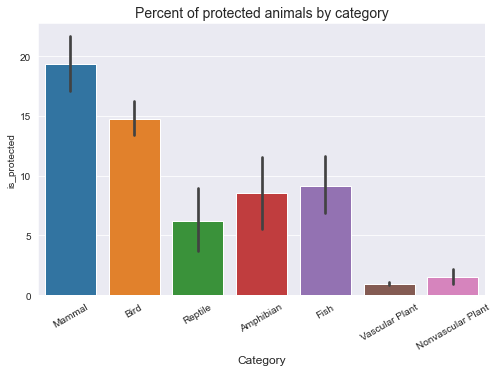

In [100]:
#Are certain types of species more likely to be endangered?
fig = plt.figure(figsize = (8, 5))
ax1 = plt.subplot()
sns.barplot(data = data_full, x = 'category', y = 'is_protected')
plt.title('Percent of protected animals by category', fontsize = 14)
plt.xlabel('Category', fontsize = 12)
plt.xticks(rotation = 30)
ax1.set_yticklabels([0, 5, 10, 15, 20])
plt.show()

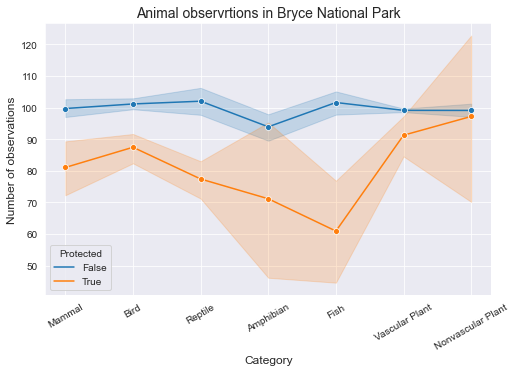

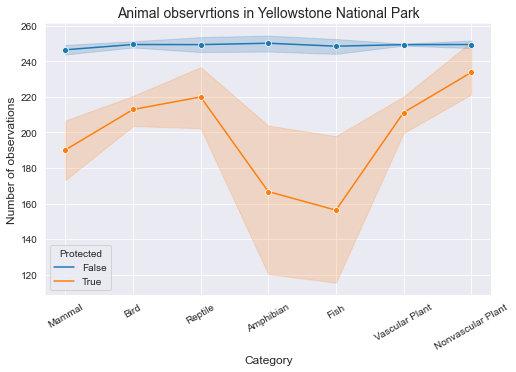

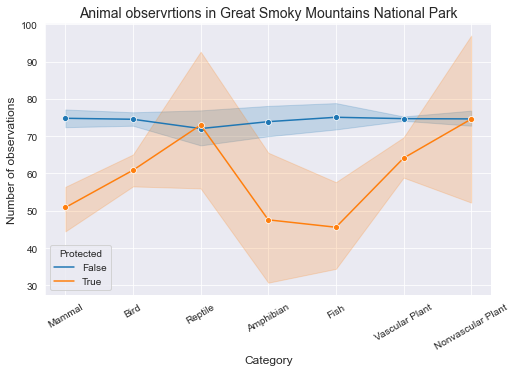

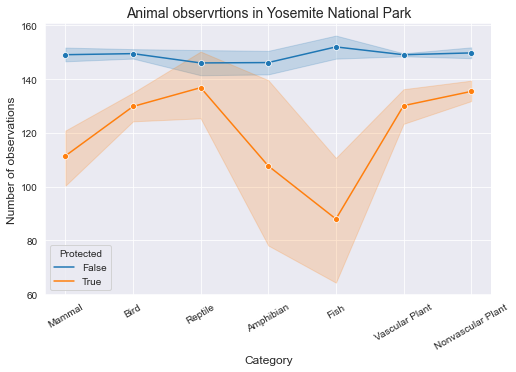

In [101]:
#Are the differences between species and their conservation status significant?
#Which species were spotted the most at each park?
def lineplot(df, park):
    sns.set_style('darkgrid')
    fig = plt.figure(figsize = (8, 5))
    ax = sns.lineplot(data = df[df.park_name == park], x = 'category', y = 'observations', hue = 'is_protected', marker = 'o')
    plt.title('Animal observrtions in {}'.format(park), fontsize = 14)
    plt.xticks(rotation = 30)
    plt.xlabel('Category', fontsize = 12)
    plt.ylabel('Number of observations', fontsize = 12)
    plt.legend(loc = 3, title = "Protected")
    plt.show()

for park in data_full.park_name.unique():
    lineplot(data_full, park)

In [102]:
#finding relationships between categories and their protection status

freq = pd.crosstab(data_full.category, data_full.is_protected)
print(freq)

bird_mammal_freq = [[2016, 348], [968, 232]]
nonv_vplant_freq = [[1312, 20], [19376, 184]]

chi2, pval, dof, expected = chi2_contingency(bird_mammal_freq)
print('P-value: ', pval, 'is less than 0.05, that means, that there is sugnifficant \
difference between endangered birds and mammals')

chi2, pval, dof, expected = chi2_contingency(nonv_vplant_freq)
print('P-value: ', pval, 'is more than 0.05, that means, that there is no sugnifficant \
difference between endangered Nonvascular Plants and Vascular Plants')


is_protected       False  True
category                      
Amphibian            300    28
Bird                2016   348
Fish                 476    48
Mammal               968   232
Nonvascular Plant   1312    20
Reptile              304    20
Vascular Plant     19376   184
P-value:  0.0005063278334220973 is less than 0.05, that means, that there is sugnifficant difference between endangered birds and mammals
P-value:  0.06147870724239952 is more than 0.05, that means, that there is no sugnifficant difference between endangered Nonvascular Plants and Vascular Plants


In [103]:
#Finding sheeps in the data
data_full['is_sheep'] = data_full.common_names.apply(lambda x: 'Sheep' in x)
sheep_data = data_full[(data_full.is_sheep == True)&(data_full.category == 'Mammal')].reset_index()
print(sheep_data)

    index category          scientific_name  \
0      12   Mammal               Ovis aries   
1      13   Mammal               Ovis aries   
2      14   Mammal               Ovis aries   
3      15   Mammal               Ovis aries   
4   15168   Mammal          Ovis canadensis   
5   15169   Mammal          Ovis canadensis   
6   15170   Mammal          Ovis canadensis   
7   15171   Mammal          Ovis canadensis   
8   20536   Mammal  Ovis canadensis sierrae   
9   20537   Mammal  Ovis canadensis sierrae   
10  20538   Mammal  Ovis canadensis sierrae   
11  20539   Mammal  Ovis canadensis sierrae   

                                         common_names conservation_status  \
0   Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
1   Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
2   Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
3   Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
4  

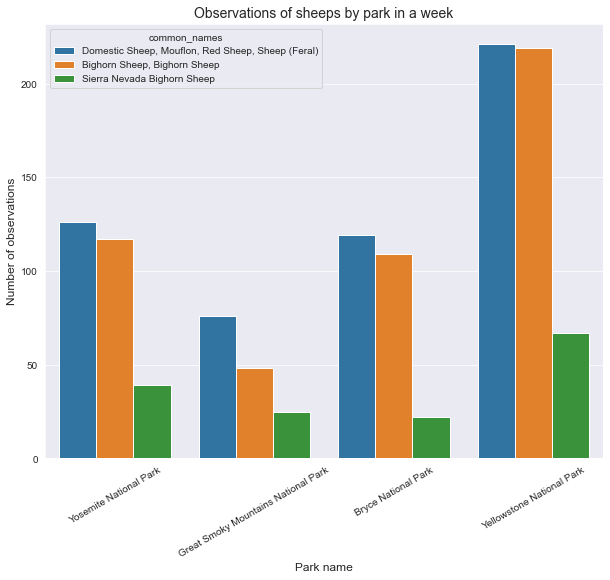

In [104]:
#Observations of sheeps by park in a week
sns.set_style('darkgrid')
fig = plt.figure(figsize = (10, 8))
ax = plt.subplot()
sns.barplot(data = sheep_data, x = 'park_name', y = 'observations', hue = 'common_names')
plt.title('Observations of sheeps by park in a week', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.xlabel('Park name', fontsize = 12)
plt.ylabel('Number of observations', fontsize = 12)
plt.show()

In [105]:
#let's find fern
data_full['is_fern'] = data_full.common_names.apply(lambda x: 'fern' in x.lower())
fern_data = data_full[(data_full.is_fern == True)&(data_full.category == 'Vascular Plant')].reset_index()
print(fern_data)

     index        category                        scientific_name  \
0     3440  Vascular Plant                  Asparagus officinalis   
1     3441  Vascular Plant                  Asparagus officinalis   
2     3442  Vascular Plant                  Asparagus officinalis   
3     3443  Vascular Plant                  Asparagus officinalis   
4     3444  Vascular Plant                  Asparagus officinalis   
..     ...             ...                                    ...   
391  25011  Vascular Plant  Athyrium filix-femina var. cyclosorum   
392  25208  Vascular Plant             Chamaebatiaria millefolium   
393  25209  Vascular Plant             Chamaebatiaria millefolium   
394  25210  Vascular Plant             Chamaebatiaria millefolium   
395  25211  Vascular Plant             Chamaebatiaria millefolium   

                              common_names conservation_status  \
0    Garden Asparagus-Fern, Wild Asparagus     No Intervention   
1    Garden Asparagus-Fern, Wild Aspara

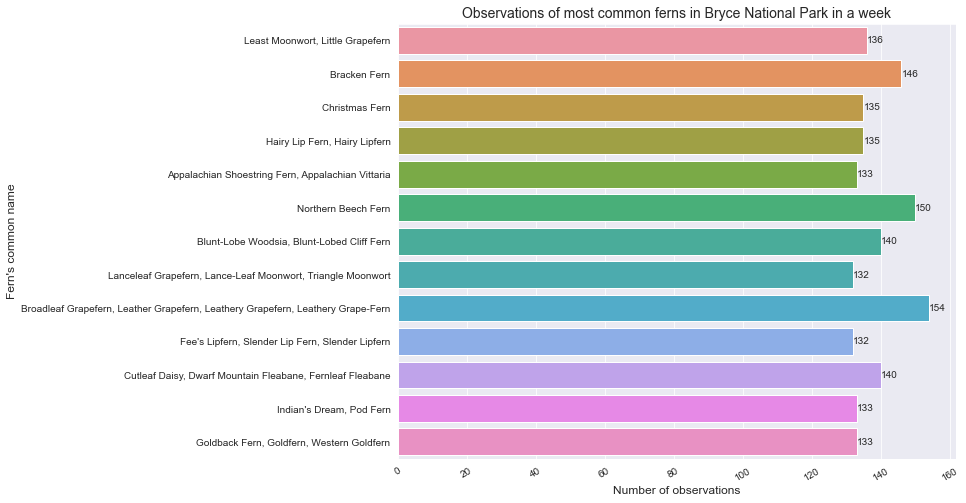

In [106]:
#Observations of sheeps by park in a week

fig = plt.figure(figsize = (10, 8))
ax = plt.subplot()
sns.barplot(data = fern_data[(fern_data.park_name == 'Bryce National Park')&(fern_data.observations >= 130)], \
            x = 'observations', y = 'common_names')
plt.title('Observations of most common ferns in Bryce National Park in a week', fontsize = 14)

plt.xticks(rotation = 30)#ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.xlabel('Number of observations', fontsize = 12)
plt.ylabel('Fern\'s common name', fontsize = 12)
ax.bar_label(ax.containers[0])
plt.show()